# Understanding artificial neural network

Like any ML algorithms our goal is to minimize some loss function given the structure of the mapping from inputs to outputs. 
- The structure of artificial neural networks is usually simple. Here I will consider fully connected networks, and the good news is that in order to undersand them, we only need to understand Logistic regression (and gradient decent).


- The minimization is done using gradient decent (or some variation of stochastic gradient decent). 

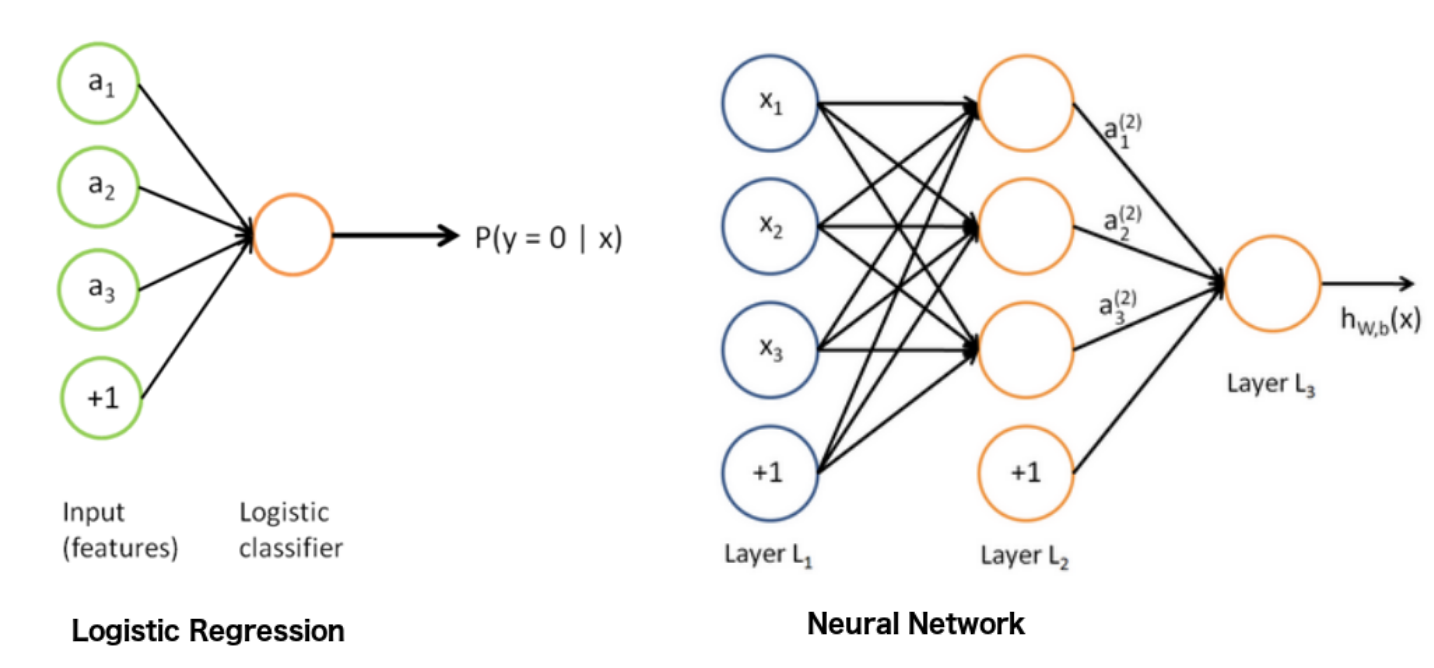

In [1]:
from IPython.display import Image
# Image taken from: https://stats.stackexchange.com/questions/366707/a-logistic-regression-with-neural-network-mindset-vs-a-shallow-neural-network
Image(filename='/Users/yani/Dropbox/MIT/ML_IAP/LogReg_NN.png', width=700)

- Each arrow represent a weight that we want to modify such that we minimize certain loss function
- The non-linearity of fully connected neural networks comes from the ''activation function'' that is used after each layer. One example of activation function is the sigmoid, which is used in logistic regression. 

<!-- - It is possible to express mathematically the operations in an ANN as: -->

# Task for today 

Here we will use neural networks (NNs) to recognize hand written digits. 
First we will build a logistic regression 'network' and later see how to generalize the logistic regression in order to use Fully connected NN. 
Later in the course we will use convolutional NN (CNN).
Some of the code was taken from:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627


Universal approximation theorem - NNs can approximate any continuous function.
A visual demonstration that neural nets can compute any function:
http://neuralnetworksanddeeplearning.com/chap4.html

# Importing relevant Packages

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torch import nn, optim
from time import time
#Allows showing plots in notebook:
%matplotlib inline
from torchvision import datasets, transforms
#import imageio

WHAT IS PYTORCH? (as defined at https://pytorch.org/) 

It’s a Python-based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

In [3]:
np.random.seed(42) # For reproducebility


## Getting the data

In [4]:
# transform for data normalization
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
# transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

#The  numbers 0.5 that are passed to the transform are the mean and the STD that will normalize each image
#image = (image - mean) / std



In [5]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

#### Checking size and shape of data

In [6]:
print('the number of images in the train set:', len(trainset))
print('the number of images in the validation/test set:', len(valset))

the number of images in the train set: 60000
the number of images in the validation/test set: 10000


Dataset and Dataloader classes provide a very convenient way of iterating over a dataset while training your machine learning model.
This provides a very convenient way of separating the data preparation part from the training procedure. 

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


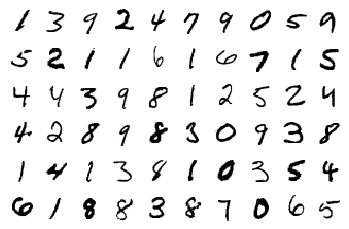

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### define network structure in pytorch 
If you want to learn more:

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html


A typical training procedure for a neural network:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

## Logistic Regression 


In Logistic Regression we want to predict the probability for a certain event (e.g., the probability that we see in an image the number 1 or zero).
If we have only 2 classes in the output, the probability in Logistic regression is predicted by:

$Probability(Y_i = 1) = \frac{1}{1 + e^{-\sum_i \beta_i x_i }}$ 

and $Probability(Y_i = 0) = 1- \frac{1}{1 + e^{-\sum_i \beta_i x_i }}$

In Logistic regression (and classification problems) we commonly use the Cross Entropy Loss 

$CrossEntropyLoss = -(y_i log(\hat{y}_i)) + (1-y_i) log(1-\hat{y}_i)) $

where $y_i$ are the true labels and $\hat{y}_i$ are the predicted probability for the label. 

Comment: The Sigmoid is defined as: $\phi(z) = \frac{1}{1 + e^{-z}}$



### multiclass logistic regression
The output of multiclass logistic regression should be the probability distribution. Therefore, we want to demand that the proboability of each label will:

- 1)  contain only non-negative values 
- 2)  sum to 1

We accomplish this by using the softmax function.

$softmax(𝑧)= \frac{e^z}{\sum_1^k e^z}$ 

where k is the number of labels

- This is a generalization of logistic regression to more than than 2 output classes

See more discussion - https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html

### define Logistic Regression network structure in pytorch 

In [9]:
#define Logistic Regression network structure in pytorch 

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(784, 10)

    def forward(self, x):
        x = self.linear(x)
        return F.log_softmax(x,dim=1) # softmax  is an extension for the sigmoid for multiclass problems - see below

Think how would you modify the Logistic regression code (and cost function) to make it a linear regression.

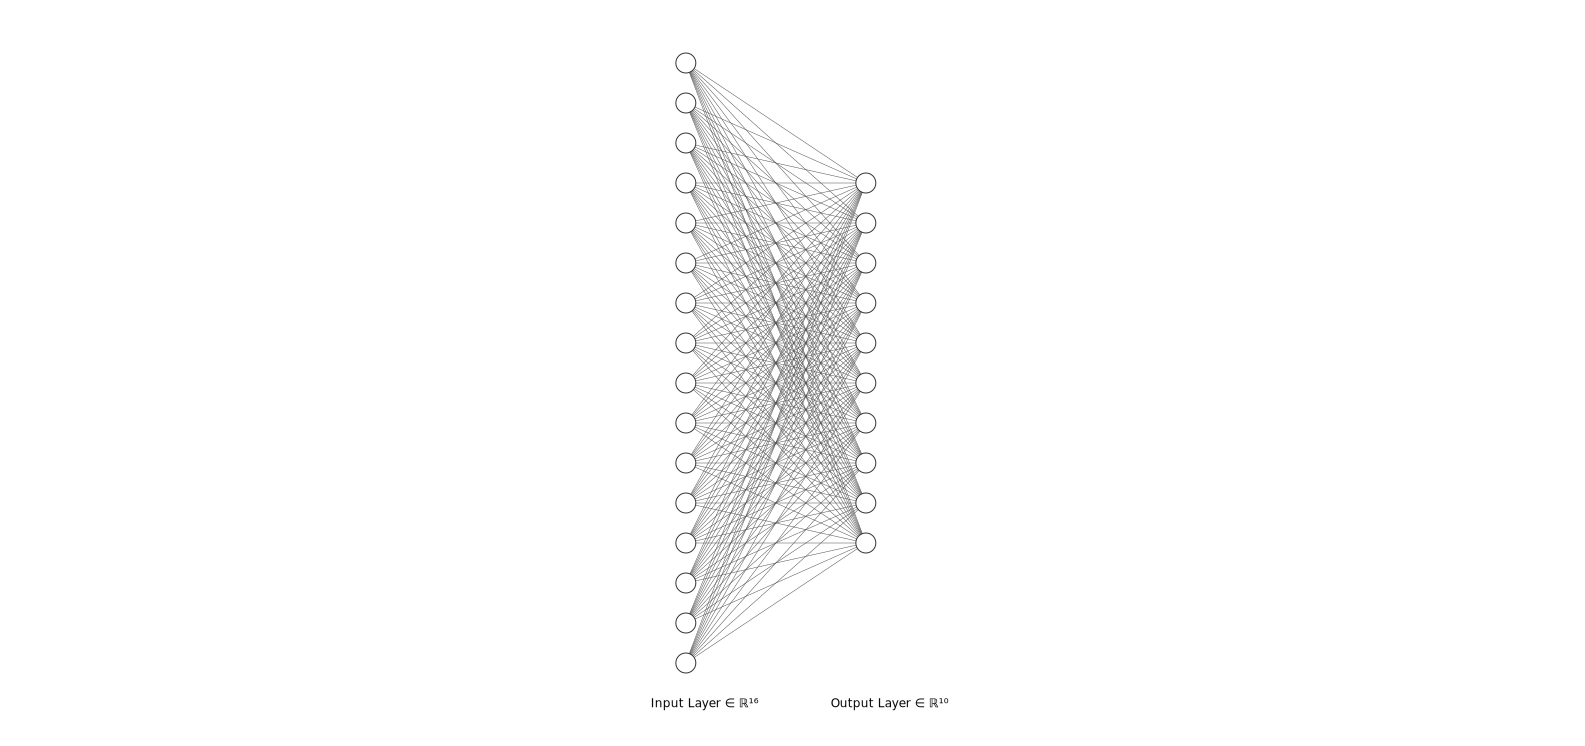

In [10]:
# No need to run this cell
# Plot an RNN - this is a smaller version from what we actually built 
# The plot was created using this website: http://alexlenail.me/ (ALEXANDER LENAIL - MIT PhD student)
from IPython.display import SVG, display
display(SVG('LogRegMNIST.svg'))

### define a fully connected network in pytorch 

In [11]:
#define network structure in pytorch 
class Net_ANN(nn.Module):
    def __init__(self):
        super(Net_ANN, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
#         self.lin_drop = nn.Dropout(0.1) #regularization method to prevent overfitting. 

    def forward(self, x):
        x = F.relu(self.linear1(x))
#         print(x.shape)
#         x = F.relu(self.lin_drop(self.linear2(x)))
        x = F.relu(self.linear2(x))
#         print(x.shape)
        x = self.linear3(x)
#         print(x.shape)
        return F.log_softmax(x,dim=1)

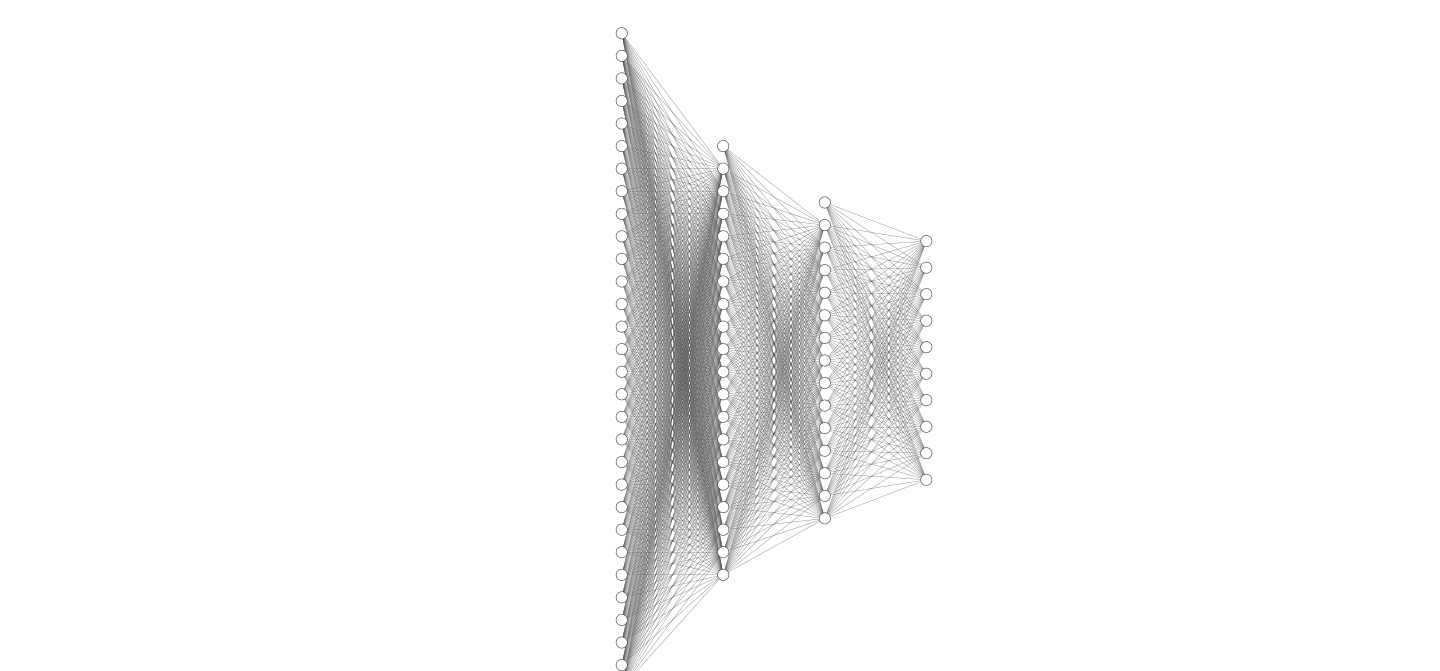

In [12]:
# No need to run this cell
# Plot an RNN - this is a smaller version from what we actually built 
# The plot was created using this website: http://alexlenail.me/ (ALEXANDER LENAIL - MIT PhD student)
from IPython.display import SVG, display
display(SVG('RNN.svg'))

In [13]:
lin_net = Net_ANN()
print(lin_net)

Net_ANN(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


### Activation function - Relu

The ReLu ativation function is just the max(0,X) - and this what is enabling the NN to be a nonlinear function of the inputs!

### Input and outputs of each layer

Each layer in the fully connected network has dimensions if 
inputs*(outputs+1). The plus one comes from the bias term. 

In [14]:
# The learnable parameters of the NN are returned by lin_net.parameters()
for i in list(lin_net.parameters()):
    print(i.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


### Using the nework to get an output

In [15]:
# An example of how to plug a sample into the network
input = torch.randn(1, 784)
out = lin_net(input) 
# when calling the model ('lin_net(input)') it calls automatically the forward method we defined (via __call__ - see https://github.com/pytorch/pytorch/blob/472be69a736c0b2aece4883be9f8b18e2f3dfbbd/torch/nn/modules/module.py#L487)
print(out)

tensor([[-2.3662, -2.3280, -2.4018, -2.1406, -2.5182, -2.3169, -2.3476, -2.0858,
         -2.2346, -2.3591]], grad_fn=<LogSoftmaxBackward>)


### Defining a loss function to optimize:

In [16]:
criterion = nn.NLLLoss() # Negative log liklihood loss function
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1) # Reshape the image batch to be a the batch_size x pixels in image

logps = lin_net(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

#### Calculating the gradients of the (loss) tensor

In [17]:
lin_net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(lin_net.linear3.bias.grad)

loss.backward(retain_graph=True) #Computes the gradient of all components current tensor

print('conv1.bias.grad after backward')
print(lin_net.linear3.bias.grad)




conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0195, -0.0016,  0.0055,  0.0181, -0.0521,  0.0252,  0.0065, -0.0039,
         0.0224, -0.0006])


### Updating the weights using optimizer (basically built in methods for optimization such as SGD, Adam and etc.)

In [18]:
optimizer = optim.SGD(lin_net.parameters(), lr=0.003, momentum=0.9)
print('Before backward pass: \n',list(lin_net.parameters())[0].data.numpy()[1][0])
loss.backward(retain_graph=True) 
optimizer.step()
print('After backward pass: \n',list(lin_net.parameters())[0].data.numpy()[1][0])

Before backward pass: 
 -0.0016330108
After backward pass: 
 -0.0016193935


it’s crucial you choose the correct learning rate as otherwise your network will either fail to train, or take much longer to converge. If you want to read more about the momentum term in SGD - https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

The value of the effective value of the gradient (V) at the step t in SGD with momentum:
$V_t = \beta V_{t-1} + (1-\beta) \nabla_w L(W,X,y)$ 

## Combining it all together:  training the whole network

In [19]:
train_losses = []
train_counter = []
test_losses = []
# test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)]
log_interval = 100 #Determines the number of print outputs while training



### Defining function for the training procedure

In [20]:
def train_ANN(net,criterion,optimizer,epoch,trainloader):
    net.train() # When using dropout this is necessary! it states that we are on a training mode.
    for batch_idx, (data, target) in enumerate(trainloader):
        # Flatten MNIST images into a 784 long vector
        data = data.view(data.shape[0], -1) 
        # gradient has to be manually set to zero because otherwise gradients are accumulated
        optimizer.zero_grad()
        # Calculates the output for some bach of figures
        output = net(data)
        # Calculates the loss
        loss = criterion(output, target)
        # This is where gradients are calculated (for the loss tensor)
        loss.backward()
        #And optimizes its weights here by some gradient decent like scheme
        optimizer.step()
        #Just to print how the progress is doing:
        if batch_idx % log_interval == 0:
            if batch_idx > 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))


### Defining function for testing

In [21]:
def test_ANN(net,criterion,testloader,batchsize=64,nsamples=10000):
    net.eval() # basically states that we are in evaluation mode. When using dropout necessary!
    test_loss = 0
    correct = 0
    flag_size = 0
    with torch.no_grad():
#     for data, target in testloader:
        for i, (data, target) in enumerate(testloader):
            data = data.view(data.shape[0], -1)  # Flatten MNIST images into a 784 long vector
            output = net(data) # get predictions
            test_loss += criterion(output, target).item() # Sum over the losses 
            pred = output.data.max(1, keepdim=True)[1] # Get label with maximum probability
            correct += pred.eq(target.data.view_as(pred)).sum() #Comparing the true labels to the predicted labels
            if i*batchsize > nsamples: # Stop loop if I estimated the performance on more than 10000 samples
                flag_size = 1
                break
    if flag_size == 1:
        max_len = i*batchsize
    else:
        max_len = len(testloader.dataset)
    test_loss /= max_len
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.5f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, max_len,
    100. * correct / max_len))

In [22]:
n_epochs = 4 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_ANN(lin_net,criterion,trainloader)
    print('Performance on the test set:')
    test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.378400
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.720443
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.657073
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.378425
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.503076
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.488890
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.424543
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.322662
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.300208

Training Time for one epoch (in minutes) = 0.15756456851959227
Performance on the train set:

Test set: Avg. loss: 0.00485, Accuracy: 9194/10048 (91.501%)

Performance on the test set:

Test set: Avg. loss: 0.00458, Accuracy: 9152/10000 (91.520%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.394640
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.267990
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.273734
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.156227
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.447665
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.291426
Tra

### Saving the trained network

In [23]:
PATH = './MNIST_ANN1.pth'
torch.save(lin_net.state_dict(), PATH)

# # If we want to load the network later:
# lin_net.load_state_dict(torch.load(PATH))


### Training more while reducing the learning rate

In [24]:
optimizer = optim.SGD(lin_net.parameters(), lr=0.001, momentum=0.9)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
  train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
  print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
  print('Performance on the train set:')
  test_ANN(lin_net,criterion,trainloader)
  print('Performance on the test set:')
  test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.094061
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.245050
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.143105
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.282840
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.069783
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.137116
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.109676
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.060642
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.133629

Training Time for one epoch (in minutes) = 0.16720623175303143
Performance on the train set:

Test set: Avg. loss: 0.00213, Accuracy: 9693/10048 (96.467%)

Performance on the test set:

Test set: Avg. loss: 0.00222, Accuracy: 9564/10000 (95.640%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.071918
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.122052
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.067354
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.104778
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.109447
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.095989
Tra

## Optimizers

The choice of which optimizer we choose might be very important. It will determine how fast the network will be able to learn. Adam is a very popular choice (read more -https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c). 

###  Using adam optimizer

In [25]:
optimizer = optim.Adam(lin_net.parameters(), lr=0.0001)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
  train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
  print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
  print('Performance on the train set:')
  test_ANN(lin_net,criterion,trainloader)
  print('Performance on the test set:')
  test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.150613
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.155703
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.134899
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.148433
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.096726
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.137734
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.076456
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.054162
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.145181

Training Time for one epoch (in minutes) = 0.16248841683069865
Performance on the train set:

Test set: Avg. loss: 0.00190, Accuracy: 9742/10048 (96.955%)

Performance on the test set:

Test set: Avg. loss: 0.00204, Accuracy: 9598/10000 (95.980%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.180140
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.185624
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.109925
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.042942
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.105989
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.103159
Tra

In [26]:
optimizer = optim.Adam(lin_net.parameters(), lr=0.0001)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
  train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
  print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
  print('Performance on the train set:')
  test_ANN(lin_net,criterion,trainloader)
  print('Performance on the test set:')
  test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.069621
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.146529
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.044798
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.296236
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.038527
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.035193
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.090985
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.066074
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.058707

Training Time for one epoch (in minutes) = 0.1829125165939331
Performance on the train set:

Test set: Avg. loss: 0.00145, Accuracy: 9840/10048 (97.930%)

Performance on the test set:

Test set: Avg. loss: 0.00177, Accuracy: 9659/10000 (96.590%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.027172
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.101302
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.161618
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.057618
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.233699
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.091809
Trai

## Visualize our predictions

Predicted Digit = 9


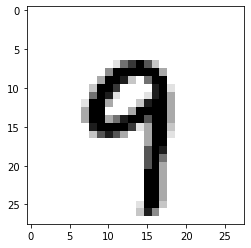

In [29]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = lin_net(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

### Visualize mistakes (try to understand if we have a reasonable result)

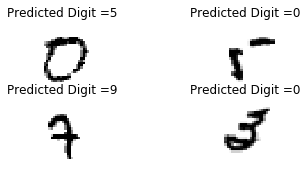

In [30]:
num_stop = 3
num_now =0 
for images,labels in valloader:
    if num_now > num_stop:
        break
    for i in range(len(labels)):
        if num_now > num_stop:
            break
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = lin_net(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label != pred_label):
            num_now = num_now + 1
            plt.subplot(num_stop, 2, num_now)
            plt.axis('off')
            plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
            title1 = 'Predicted Digit =' +str(probab.index(max(probab)))
            plt.title(title1)
#             plt.title('my random fig') 




# Normalizing Inputs

Normalizing the inputs speed up the training of a neural network.
For more reading (https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd , https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ , https://www.jeremyjordan.me/batch-normalization/)

## BatchNormalization 

Normalize the activation values such that the hidden representation doesn’t vary drastically and also helps us to get improvement in the training speed.

In [ ]:
#define network structure in pytorch with batch normalization
class Net_ANN_batchN(nn.Module):
    def __init__(self):
        super(Net_ANN_batchN, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        self.dense1_bn = nn.BatchNorm1d(128)
        self.dense2_bn = nn.BatchNorm1d(64)
#         self.lin_drop = nn.Dropout(0.1) #regularization method to prevent overfitting. 

    def forward(self, x):
#         x = nn.BatchNorm1d(F.relu(self.linear1(x)),128)
        x = F.relu(self.dense1_bn(self.linear1(x)))
#         print(x.shape)
#         x = F.relu(self.lin_drop(self.linear2(x)))
        x = F.relu(self.dense2_bn(self.linear2(x)))
#         print(x.shape)
        x = self.linear3(x)
#         print(x.shape)
        return F.log_softmax(x,dim=1)

# Regularization in Neural Networks

- L2 and L1 regularization
- Dropout
- Data augmentation
- Early stopping